<a href="https://colab.research.google.com/github/ikikika/data_science/blob/house_prices-kaggle/house_prices-kaggle/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition: House Prices: Advanced Regression Techniques
Predict the final price of each home

In [38]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Import train and test data
train = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/house_prices-kaggle/house_prices-kaggle/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/house_prices-kaggle/house_prices-kaggle/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [40]:
# See how many null values are there
all_columns = train.isnull().sum().sort_values(ascending=False)
for key,value in all_columns.items():
    print(key,",",value, ",", train[key].dtypes)

PoolQC , 1453 , object
MiscFeature , 1406 , object
Alley , 1369 , object
Fence , 1179 , object
FireplaceQu , 690 , object
LotFrontage , 259 , float64
GarageCond , 81 , object
GarageType , 81 , object
GarageYrBlt , 81 , float64
GarageFinish , 81 , object
GarageQual , 81 , object
BsmtExposure , 38 , object
BsmtFinType2 , 38 , object
BsmtFinType1 , 37 , object
BsmtCond , 37 , object
BsmtQual , 37 , object
MasVnrArea , 8 , float64
MasVnrType , 8 , object
Electrical , 1 , object
Utilities , 0 , object
YearRemodAdd , 0 , int64
MSSubClass , 0 , int64
Foundation , 0 , object
ExterCond , 0 , object
ExterQual , 0 , object
Exterior2nd , 0 , object
Exterior1st , 0 , object
RoofMatl , 0 , object
RoofStyle , 0 , object
YearBuilt , 0 , int64
LotConfig , 0 , object
OverallCond , 0 , int64
OverallQual , 0 , int64
HouseStyle , 0 , object
BldgType , 0 , object
Condition2 , 0 , object
BsmtFinSF1 , 0 , int64
MSZoning , 0 , object
LotArea , 0 , int64
Street , 0 , object
Condition1 , 0 , object
Neighborhood 

In [41]:
train.shape
# Drop features that has > 730 (50%) null values

(1460, 81)

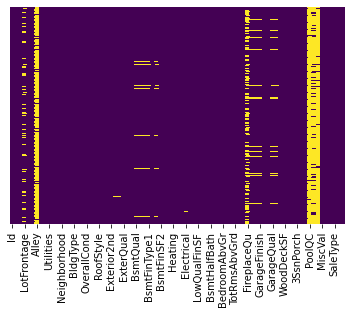

In [42]:
# Visualise null values
sns.heatmap( 
    train.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

In [43]:
# Drop features with too many missing values
train.drop( ['Id'], axis=1, inplace=True )
train.drop( ['PoolQC'], axis=1, inplace=True )
train.drop( ['MiscFeature'], axis=1, inplace=True )
train.drop( ['Alley'], axis=1, inplace=True )
train.drop( ['Fence'], axis=1, inplace=True )

test.drop( ['Id'], axis=1, inplace=True )
test.drop( ['PoolQC'], axis=1, inplace=True )
test.drop( ['MiscFeature'], axis=1, inplace=True )
test.drop( ['Alley'], axis=1, inplace=True )
test.drop( ['Fence'], axis=1, inplace=True )

In [44]:
# Fill in missing values
# If type is str/object, fillna with mode
# If type is int/float, fillna with mean
# train['FireplaceQu'] = train['FireplaceQu'].fillna( train['FireplaceQu'].mode()[0] )
# train['LotFrontage'] = train['LotFrontage'].fillna( train['LotFrontage'].mean() )

# FireplaceQu , 690 , object
# LotFrontage , 259 , float64
# GarageCond , 81 , object
# GarageType , 81 , object
# GarageYrBlt , 81 , float64
# GarageFinish , 81 , object
# GarageQual , 81 , object
# BsmtExposure , 38 , object
# BsmtFinType2 , 38 , object
# BsmtFinType1 , 37 , object
# BsmtCond , 37 , object
# BsmtQual , 37 , object
# MasVnrArea , 8 , float64
# MasVnrType , 8 , object
# Electrical , 1 , object



In [45]:
all_columns_train = train.isnull().sum().sort_values(ascending=False)
for key,value in all_columns_train.items():
  if( value > 0 ):
    if( train[key].dtypes == "object" ):
      train[key] = train[key].fillna( train[key].mode()[0] )
    elif( train[key].dtypes == "float64" ):
      train[key] = train[key].fillna( train[key].mean() )

all_columns_test = test.isnull().sum().sort_values(ascending=False)
for key,value in all_columns_test.items():
  if( value > 0 ):
    if( test[key].dtypes == "object" ):
      test[key] = test[key].fillna( test[key].mode()[0] )
    elif( test[key].dtypes == "float64" ):
      test[key] = test[key].fillna( test[key].mean() )

In [46]:
train.isnull().sum().sort_values(ascending=False)
# Since we have sorted it by descending, if first and last values are 0, means that there are no more null values.

SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
MSSubClass      0
Length: 76, dtype: int64

In [47]:
test.isnull().sum().sort_values(ascending=False)

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
MSSubClass       0
Length: 75, dtype: int64

In [48]:
# Extract all categorical columns 
columns_train = []
for key,value in train.items():
  if( train[key].dtypes == "object" ):
    columns_train.append(key)

len(columns_train)

39

In [49]:
# Combine test and train data
# Because we will be applying oneHotEncoding to all categorical features,
# Train data and test data may contain different number of categorical values
# eg, feature 'LotShape'. train data may contain values 'reg', 'RL' and test data may contain values 'med', 'RL',
# if we dont combine the data before apply OHC, the encoded variables will be different
df_all_data = pd.concat( [ train, test ], axis=0 )

In [50]:
df_all_data['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [51]:
# Function to apply one hot encoding
def category_onehot_multiple_columns( multiple_columns ):
    df_final = df_all_data
    i=0
    for field in multiple_columns:
        df1 = pd.get_dummies(df_all_data[field],drop_first=True)
        df_all_data.drop([field],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    df_final=pd.concat([df_all_data,df_final],axis=1)
    return df_final

In [52]:
df_all_data = category_onehot_multiple_columns( columns_train )

In [53]:
df_all_data.shape

(2919, 237)

In [54]:
df_all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,...,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [55]:
df_all_data =df_all_data.loc[:,~df_all_data.columns.duplicated()]
# Remove all duplicated columns

In [56]:
df_all_data.shape

(2919, 177)

In [57]:
df_all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,...,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.000000,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,...,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.000000,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.000000,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.000000,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.000000,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1977.721217,0.0,0.0,0,0,0,0,0,0,0,6,2006,NaN,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1977.721217,0.0,0.0,80,32,0,0,0,0,700,7,2006,NaN,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [58]:
train.shape

(1460, 76)

In [59]:
test.shape

(1459, 75)

In [60]:
df_train = df_all_data.iloc[:1460,:]
df_test = df_all_data.iloc[1460:,:]

In [61]:
df_train.isnull().sum().sort_values(ascending=False)

Partial       0
2fmCon        0
IDOTRR        0
Gilbert       0
Edwards       0
             ..
HdBoard       0
CemntBd       0
CBlock        0
BrkFace       0
MSSubClass    0
Length: 177, dtype: int64

In [62]:
df_train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [63]:
df_test['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [64]:
df_test.drop( ['SalePrice'], axis=1, inplace=True )

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
df_test.isnull().sum().sort_values(ascending=False)

Partial       0
Normal        0
MeadowV       0
IDOTRR        0
Gilbert       0
             ..
ImStucc       0
HdBoard       0
CemntBd       0
CBlock        0
MSSubClass    0
Length: 176, dtype: int64

In [66]:
x_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train['SalePrice']

In [67]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,FV,RH,RL,RM,...,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Apply Machine Learning Algorithm

In [69]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train, y_train)

[15:07:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [70]:
# Apply classifier to test dataframe
y_predict = classifier.predict(df_test)

In [76]:
y_predict

array([124454.31, 156617.06, 180028.75, ..., 168865.73, 121561.18,
       237769.38], dtype=float32)

In [75]:
test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [84]:
# Create Sample submission file and submit
submission = pd.concat( [ test['Id'], pd.DataFrame(y_predict) ], axis=1 )
submission.columns = [ 'Id', 'SalePrice' ]
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,124454.31250
1,1462,156617.06250
2,1463,180028.75000
3,1464,180580.78125
4,1465,192951.78125
